In [1]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('col_rev.tsv', delimiter = '\t', quoting = 3)

ModuleNotFoundError: No module named 'matplotlib'

In [41]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

dataset['word_count'] = dataset['Review'].apply(lambda x: len(str(x).split(" ")))
dataset[['Review','word_count']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annfrieda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,word_count
0,everyone's doing research! whether you are a s...,22
1,"if the grading could be a little more lenient,...",29
2,great.,1
3,"the lack of field trips, participation, and mo...",21
4,college is good.,3


In [42]:
dataset['char_count'] = dataset['Review'].str.len() ## this also includes spaces
dataset[['Review','char_count']].head()

,Review,char_count
0,everyone's doing research! whether you are a s...,137
1,"if the grading could be a little more lenient,...",168
2,great.,6
3,"the lack of field trips, participation, and mo...",123
4,college is good.,16


In [2]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

dataset['avg_word'] = dataset['Review'].apply(lambda x: avg_word(x))
dataset[['Review','avg_word']].head()

NameError: name 'dataset' is not defined

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

dataset['stopwords'] = dataset['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset[['Review','stopwords']].head()

,Review,stopwords
0,everyone's doing research! whether you are a s...,9
1,"if the grading could be a little more lenient,...",14
2,great.,0
3,"the lack of field trips, participation, and mo...",11
4,college is good.,1


In [45]:
dataset['hastags'] = dataset['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataset[['Review','hastags']].head()

,Review,hastags
0,everyone's doing research! whether you are a s...,0
1,"if the grading could be a little more lenient,...",0
2,great.,0
3,"the lack of field trips, participation, and mo...",0
4,college is good.,0


In [46]:
dataset['numerics'] = dataset['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
dataset[['Review','numerics']].head()

,Review,numerics
0,everyone's doing research! whether you are a s...,0
1,"if the grading could be a little more lenient,...",0
2,great.,0
3,"the lack of field trips, participation, and mo...",0
4,college is good.,0


In [47]:
dataset['upper'] = dataset['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
dataset[['Review','upper']].head()

,Review,upper
0,everyone's doing research! whether you are a s...,0
1,"if the grading could be a little more lenient,...",0
2,great.,0
3,"the lack of field trips, participation, and mo...",0
4,college is good.,0


In [48]:
dataset['Review'] = dataset['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataset['Review'].head()

0    everyone's doing research! whether you are a s...
1    if the grading could be a little more lenient,...
2                                               great.
3    the lack of field trips, participation, and mo...
4                                     college is good.
Name: Review, dtype: object

In [49]:
dataset['Review'] = dataset['Review'].str.replace('[^\w\s]','')
dataset['Review'].head()

0    everyones doing research whether you are a soc...
1    if the grading could be a little more lenient ...
2                                                great
3    the lack of field trips participation and moti...
4                                      college is good
Name: Review, dtype: object

In [79]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
dataset['Review'] = dataset['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataset['Review'].head()

0    everyones research whether social sciences ste...
1    grading could little lenient would however und...
2                                                     
3    lack field trips participation motivation enga...
4                                                     
Name: Review, dtype: object

In [80]:
freq = pd.Series(' '.join(dataset['Review']).split()).value_counts()[:10]

In [81]:
freq

campus      4
people      4
bad         4
online      4
quality     4
works       4
building    4
ucla        4
feel        4
work        4
dtype: int64

In [82]:
#freq = list(freq.index)
#dataset['Review'] = dataset['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#dataset['Review'].head()

In [83]:
#freq = pd.Series(' '.join(dataset['Review']).split()).value_counts()[-10:]
#freq

In [84]:
#freq = list(freq.index)
#dataset['Review'] = dataset['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#dataset['Review'].head()

In [85]:
#from textblob import TextBlob
#dataset['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [86]:
#TextBlob(dataset['Review'][1]).words

In [102]:
from nltk.stem import PorterStemmer
corpus =[]
st = PorterStemmer()
review = dataset['Review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
corpus.append(review)
print(corpus)

[0    everyon research whether social scienc stem st...
1    grade could littl lenient would howev understa...
2                                                     
3    lack field trip particip motiv engag primari r...
4                                                     
Name: Review, dtype: object]


In [106]:
dataset['Review'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (0.011111111111111112, 0.10555555555555556)
1                   (0.0945, 0.4213333333333333)
2                                     (0.0, 0.0)
3                   (0.125, 0.44999999999999996)
4                                     (0.0, 0.0)
Name: Review, dtype: object

In [107]:
dataset['sentiment'] = dataset['Review'].apply(lambda x: TextBlob(x).sentiment[0] )
dataset[['Review','sentiment']].head()

,Review,sentiment
0,everyones research whether social sciences ste...,0.011111
1,grading could little lenient would however und...,0.094500
2,,0.000000
3,lack field trips participation motivation enga...,0.125000
4,,0.000000


In [126]:
text_blob_object = TextBlob(dataset['Review'][50])
print(text_blob_object.sentiment)

Sentiment(polarity=0.0, subjectivity=0.5)


In [127]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

dataset['Sentiment_Polarity'] = dataset['Review'].apply(find_pol)
dataset.head()

,Review,Liked,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,Sentiment_Polarity
0,everyones research whether social sciences ste...,1,22,137,5.272727,9,0,0,0,0.011111,0.011111
1,grading could little lenient would however und...,1,29,168,4.827586,14,0,0,0,0.094500,0.094500
2,,1,1,6,6.000000,0,0,0,0,0.000000,0.000000
3,lack field trips participation motivation enga...,0,21,123,4.904762,11,0,0,0,0.125000,0.125000
4,,1,3,16,4.666667,1,0,0,0,0.000000,0.000000


/Users/annfrieda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


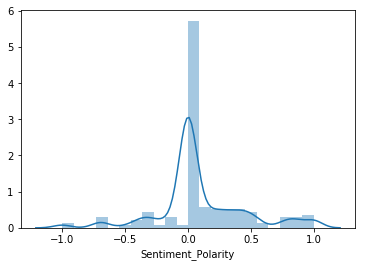

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataset['Sentiment_Polarity'])

In [131]:
most_negative = dataset[dataset.Sentiment_Polarity == -1].Review.head()
print(most_negative)

7     professors knowledgeable helpful understanding...
32             descent location pathetic infrastructure
Name: Review, dtype: object


In [132]:
most_positive = dataset[dataset.Sentiment_Polarity == 1].Review.head()
print(most_positive)

21     excellent place go
41              impressed
44              excellent
120                  best
139      excellent choice
Name: Review, dtype: object
